<a href="https://colab.research.google.com/github/Sharon-n789/Air-Quality-Project/blob/main/AirQuality_Forecasting_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset and Dependencies


*   Import the necessary library that is required for data processing.
*   Using the pandas libbrary to read csv file.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
air_data = pd.read_csv('/content/AirQualityUCI.csv')

In [ ]:
air_data.head()

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;

# Data Preprocessing & Cleaning


*   After Reading the file, cleaning and handling the missing values and other column issues.
*   Missing values are present but they are changed into ```-200```
*   Decimal Points are present in the form of *comma*.
*   Removing the null *rows* and *columns*
*   After identifying ```-200``` they are converted into the **mean** of that particular column.










File is separated using semi colon symbol, not comma.
Rectifying the decimal point also.

In [ ]:
air_data = pd.read_csv('/content/AirQualityUCI.csv', sep = ';', decimal = ',')

In [ ]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

Removing the last 2 unwanted Columns

In [ ]:
air_data = air_data.iloc[:,:-2]

In [ ]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [ ]:
air_data.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

In [ ]:
air_data.shape

(9471, 15)

In [ ]:
air_data.iloc[[9356]]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9356        816.0  28.5  13.1  0.5028

In [ ]:
air_data = air_data.head(9357)

In [ ]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [ ]:
air_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [ ]:
air_data.shape

(9357, 15)

In [ ]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

No missing values, but actual missing values are tagged with the value - "-200".

In [ ]:
air_data.isin({-200}).sum(axis = 0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Handling the missing values**

Convert all -200 into NaN

In [ ]:
air_data = air_data.replace(to_replace=-200, value = np.nan)

Actual null values

In [ ]:
air_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Now converting it into mean of that particular column

In [ ]:
air_data.mean()

TypeError: Could not convert ['10/03/200410/03/200410/03/200410/03/200410/03/200410/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200411/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200412/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200413/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200414/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200415/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200416/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200417/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200418/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200419/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200420/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200421/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200422/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200423/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200424/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200425/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200426/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200427/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200428/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200429/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200430/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200431/03/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200401/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200402/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200403/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200404/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200405/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200406/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200407/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200408/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200409/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200410/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200411/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200412/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200413/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200414/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200415/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200416/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200417/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200418/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200419/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200420/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200421/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200422/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200423/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200424/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200425/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200426/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200427/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200428/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200429/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200430/04/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200401/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200402/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200403/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200404/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200405/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200406/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200407/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200408/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200409/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200410/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200411/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200412/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200413/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200414/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200415/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200416/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200417/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200418/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200419/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200420/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200421/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200422/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200423/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200424/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200425/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200426/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200427/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200428/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200429/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200430/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200431/05/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200401/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200402/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200403/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200404/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200405/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200406/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200407/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200408/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200409/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200410/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200411/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200412/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200413/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200414/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200415/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200416/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200417/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200418/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200419/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200420/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200421/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200422/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200423/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200424/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200425/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200426/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200427/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200428/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200429/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200430/06/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200401/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200402/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200403/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200404/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200405/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200406/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200407/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200408/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200409/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200410/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200411/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200412/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200413/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200414/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200415/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200416/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200417/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200418/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200419/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200420/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200421/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200422/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200423/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200424/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200425/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200426/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200427/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200428/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200429/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200430/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200431/07/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200401/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200402/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200403/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200404/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200405/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200406/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200407/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200408/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200409/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200410/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200411/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200412/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200413/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200414/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200415/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200416/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200417/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200418/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200419/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200420/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200421/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200422/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200423/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200424/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200425/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200426/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200427/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200428/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200429/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200430/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200431/08/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200401/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200402/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200403/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200404/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200405/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200406/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200407/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200408/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200409/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200410/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200411/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200412/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200413/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200414/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200415/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200416/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200417/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200418/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200419/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200420/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200421/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200422/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200423/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200424/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200425/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200426/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200427/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200428/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200429/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200430/09/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200401/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200402/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200403/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200404/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200405/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200406/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200407/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200408/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200409/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200410/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200411/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200412/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200413/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200414/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200415/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200416/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200417/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200418/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200419/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200420/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200421/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200422/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200423/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200424/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200425/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200426/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200427/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200428/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200429/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200430/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200431/10/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200401/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200402/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200403/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200404/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200405/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200406/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200407/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200408/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200409/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200410/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200411/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200412/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200413/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200414/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200415/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200416/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200417/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200418/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200419/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200420/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200421/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200422/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200423/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200424/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200425/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200426/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200427/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200428/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200429/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200430/11/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200401/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200402/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200403/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200404/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200405/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200406/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200407/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200408/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200409/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200410/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200411/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200412/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200413/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200414/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200415/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200416/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200417/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200418/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200419/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200420/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200421/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200422/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200423/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200424/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200425/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200426/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200427/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200428/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200429/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200430/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200431/12/200401/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200501/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200502/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200503/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200504/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200505/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200506/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200507/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200508/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200509/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200510/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200511/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200512/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200513/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200514/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200515/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200516/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200517/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200518/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200519/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200520/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200521/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200522/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200523/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200524/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200525/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200526/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200527/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200528/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200529/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200530/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200531/01/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200501/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200502/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200503/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200504/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200505/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200506/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200507/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200508/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200509/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200510/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200511/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200512/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200513/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200514/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200515/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200516/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200517/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200518/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200519/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200520/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200521/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200522/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200523/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200524/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200525/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200526/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200527/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200528/02/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200501/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200502/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200503/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200504/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200505/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200506/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200507/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200508/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200509/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200510/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200511/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200512/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200513/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200514/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200515/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200516/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200517/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200518/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200519/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200520/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200521/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200522/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200523/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200524/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200525/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200526/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200527/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200528/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200529/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200530/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200531/03/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200501/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200502/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200503/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/200504/04/2005'
 '18.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.0015.00.0016.00.0017.00.0018.00.0019.00.0020.00.0021.00.0022.00.0023.00.0000.00.0001.00.0002.00.0003.00.0004.00.0005.00.0006.00.0007.00.0008.00.0009.00.0010.00.0011.00.0012.00.0013.00.0014.00.00'] to numeric

In [ ]:
air_data.select_dtypes(include='float').mean()

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [ ]:
cols_to_convert = air_data.columns.difference(['Date', 'Time'])

for col in cols_to_convert:
    air_data[col] = pd.to_numeric(air_data[col], errors='coerce')

# Fill NaNs in numeric columns
air_data.fillna(air_data.mean(numeric_only=True), inplace=True)

In [ ]:
air_data.tail()

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0  218.811816      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  218.811816      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  218.811816      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0  218.811816       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [ ]:
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Prerequiste before using the FB Prophet model.


*   FB Prophet only takes two column - *ds (YYYY/MM/DD HH:MM:SS)* and *y (any attribute column)*
*   To meet this criteria, we have to convert the date format and combine date and time column as *ds*
*   *ds* column needs to be in **"date/time format"**


Converting the date from DD/MM/YYYY to YYYY/MM/DD

In [ ]:
date_info = pd.to_datetime(air_data['Date'], dayfirst=True)
print(date_info)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [ ]:
time_info = air_data['Time']

In [ ]:
time_info = time_info.apply(lambda x:x.replace('.',':'))
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [ ]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Combining 2 series to a pandas dataframe

In [ ]:
date_time = pd.concat([date_info, time_info], axis = 1)

In [ ]:
date_time.head()

Date      Time
0 2004-03-10  18:00:00
1 2004-03-10  19:00:00
2 2004-03-10  20:00:00
3 2004-03-10  21:00:00
4 2004-03-10  22:00:00

In [ ]:
date_time['ds'] = date_time['Date'].astype(str)+' '+ date_time['Time'].astype(str)

In [ ]:
date_time.head()

Date      Time                   ds
0 2004-03-10  18:00:00  2004-03-10 18:00:00
1 2004-03-10  19:00:00  2004-03-10 19:00:00
2 2004-03-10  20:00:00  2004-03-10 20:00:00
3 2004-03-10  21:00:00  2004-03-10 21:00:00
4 2004-03-10  22:00:00  2004-03-10 22:00:00

In [ ]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


Convert ds into date time format

In [ ]:
data = pd.DataFrame()

In [ ]:
data['ds'] = pd.to_datetime(date_time['ds'])

In [ ]:
data.head()

ds
0 2004-03-10 18:00:00
1 2004-03-10 19:00:00
2 2004-03-10 20:00:00
3 2004-03-10 21:00:00
4 2004-03-10 22:00:00

In [ ]:
data['y'] = air_data['RH']

In [ ]:
data.head()

ds     y
0 2004-03-10 18:00:00  48.9
1 2004-03-10 19:00:00  47.7
2 2004-03-10 20:00:00  54.0
3 2004-03-10 21:00:00  60.0
4 2004-03-10 22:00:00  59.6

# Model Working & Training


*   Installing the FB Prophet and using it for forecasting.
*   Training it on **data** dataframe made consisting only *ds* and *y* columns



Two task can be performed from this dataset:
1. Forecasting
2. Regression

**Forecasting with FB Prophet Model**

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

**Training the Prophet Model**

In [ ]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowinf6vg/ux0tk4hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowinf6vg/tzd34920.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75426', 'data', 'file=/tmp/tmpowinf6vg/ux0tk4hk.json', 'init=/tmp/tmpowinf6vg/tzd34920.json', 'output', 'file=/tmp/tmpowinf6vg/prophet_model_1fi13lj/prophet_model-20250731063519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:35:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_predict = model.make_future_dataframe(periods=365, freq='H')
future_predict.tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


ds
9717 2005-04-19 15:00:00
9718 2005-04-19 16:00:00
9719 2005-04-19 17:00:00
9720 2005-04-19 18:00:00
9721 2005-04-19 19:00:00

In [ ]:
forecast = model.predict(future_predict)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
9717 2005-04-19 15:00:00  33.494204   18.849618   49.067593
9718 2005-04-19 16:00:00  33.977616   18.997504   48.883560
9719 2005-04-19 17:00:00  35.610862   19.910730   51.241881
9720 2005-04-19 18:00:00  38.506470   23.693058   53.766915
9721 2005-04-19 19:00:00  42.060689   26.828905   57.682567

# Visualization

*   Visualization done by plot method present in Prophet model/class
*   Scatter plot and line graph can be seen of the predicted values.




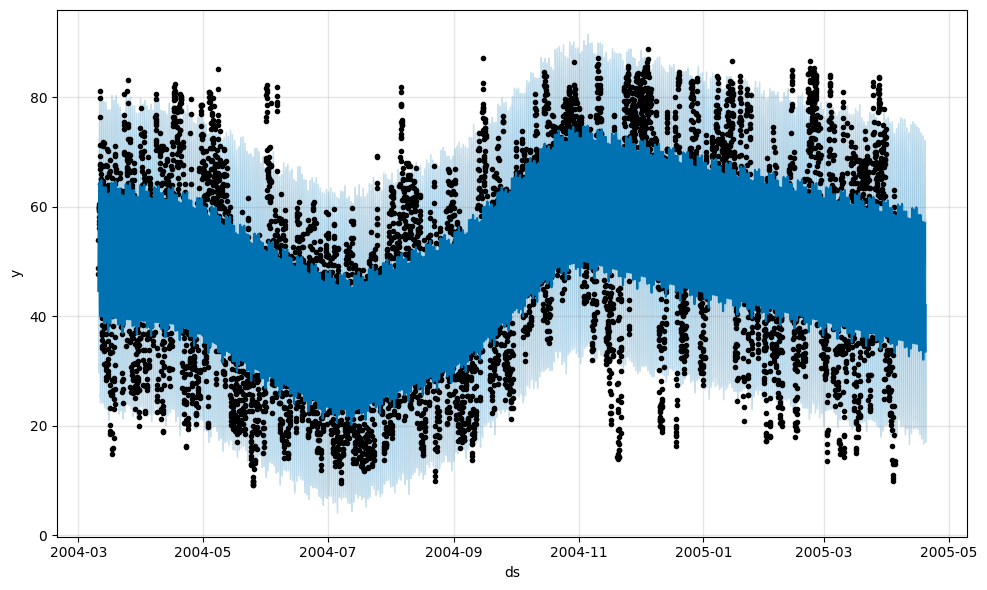

In [ ]:
fig1 = model.plot(forecast)

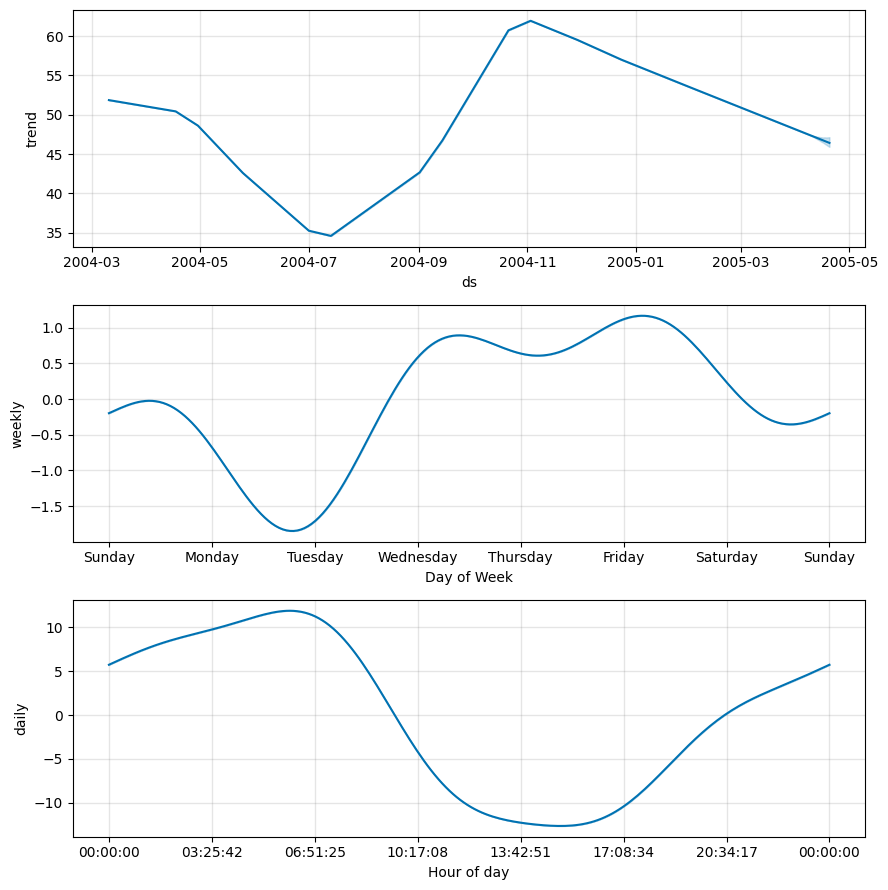

In [ ]:
fig2 = model.plot_components(forecast)

# Attribute Change


*   Earlier  **y - RH(Relative Humidity)** was taken.
*   Now **y - CO(GT)**



**Now, trying with "y" as CO(GT)**

In [ ]:
data['y'] = air_data['CO(GT)']

In [ ]:
data.head()

ds    y
0 2004-03-10 18:00:00  2.6
1 2004-03-10 19:00:00  2.0
2 2004-03-10 20:00:00  2.2
3 2004-03-10 21:00:00  2.2
4 2004-03-10 22:00:00  1.6

In [ ]:
m = Prophet()

In [ ]:
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowinf6vg/1dfihm5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpowinf6vg/whbdopq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33364', 'data', 'file=/tmp/tmpowinf6vg/1dfihm5i.json', 'init=/tmp/tmpowinf6vg/whbdopq4.json', 'output', 'file=/tmp/tmpowinf6vg/prophet_modelqhbobg10/prophet_model-20250731064706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365, freq='H')
future.tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


ds
9717 2005-04-19 15:00:00
9718 2005-04-19 16:00:00
9719 2005-04-19 17:00:00
9720 2005-04-19 18:00:00
9721 2005-04-19 19:00:00

In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
9717 2005-04-19 15:00:00  1.902328    0.542122    3.295786
9718 2005-04-19 16:00:00  2.142878    0.769317    3.428720
9719 2005-04-19 17:00:00  2.554207    1.216531    4.000667
9720 2005-04-19 18:00:00  2.991605    1.626077    4.367690
9721 2005-04-19 19:00:00  3.207758    1.896710    4.650909

# Visualization for both Attributes


*   Attribute of the **RH** and **CO(GT)** are shown in graphs.
*   **Plotly graph visualization** is also used - It is the interactive graph visualization.



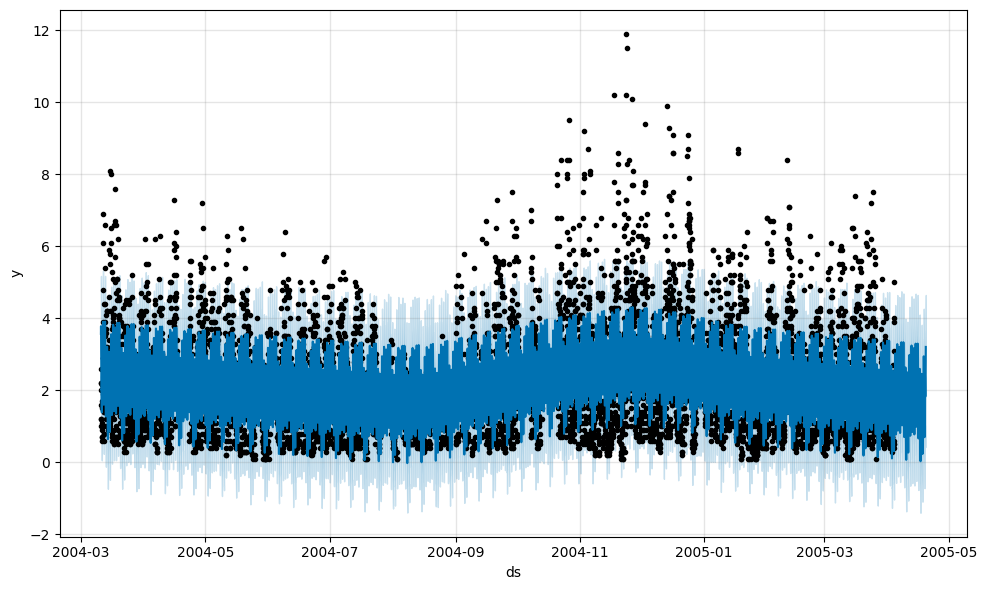

In [ ]:
fig3 = m.plot(forecast)

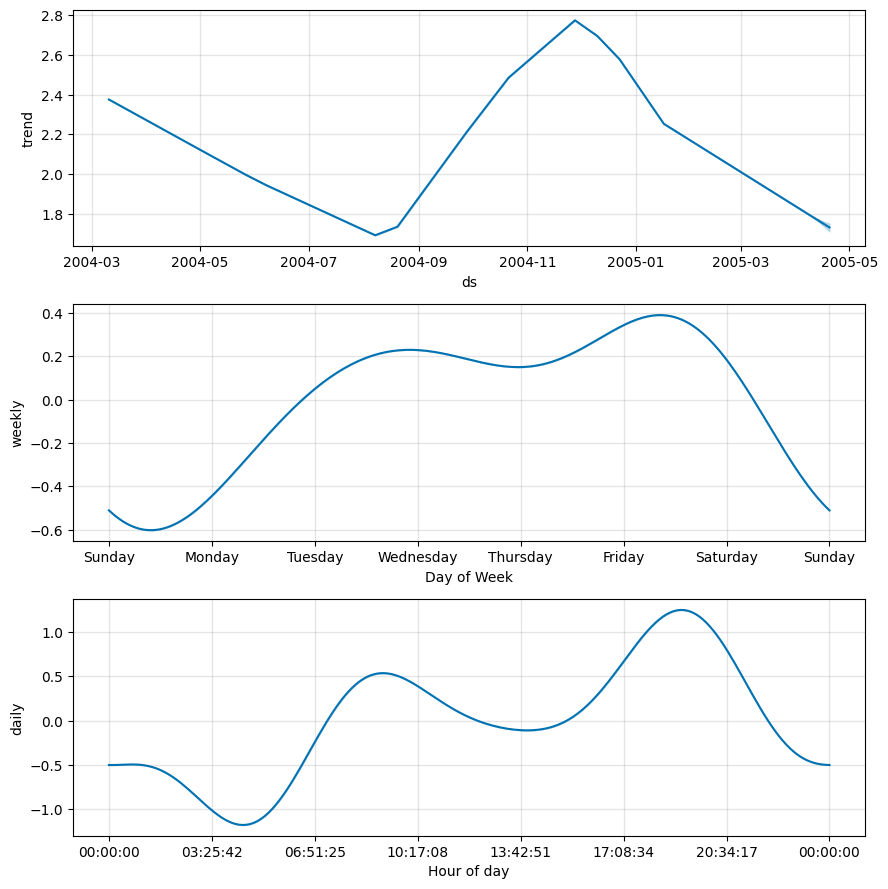

In [ ]:
fig4 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)